<a href="https://colab.research.google.com/github/AmiraSharabash/Project_5/blob/main/Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Invoice: Represents the order ID.
####Branch: Branch of the supermarket.
####City: City of the supermarket. (Note: Branch and city represent the same information.)
####Customer Type: Type of customer (member or non-member).
####Product line: Type of the product category.
####Unit Price: Price of single unit.
####Quantity: Quantity of ordered product.
####Tax 5%: Tax on order.
####Total: Total value of order.
####Date: Order date.
####Time: Time of day for order.
####Payment: Mode of payment.
####cogs: Cost of order.
####gross margin percentage: Profit margin of the order.
####gross income: Total profit of the order.
####Rating: Customer rating received.

#Importing Libraries

In [34]:
#from matplotlib import pyplot as plt
# import matplotlib as plt


import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
import matplotlib.cm as cm

#Importing & Inspecting Dataset

In [35]:
df=pd.read_csv('supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [37]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.describe().round(1)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,55.7,5.5,15.4,323.0,307.6,4.8,15.4,7.0
std,26.5,2.9,11.7,245.9,234.2,0.0,11.7,1.7
min,10.1,1.0,0.5,10.7,10.2,4.8,0.5,4.0
25%,32.9,3.0,5.9,124.4,118.5,4.8,5.9,5.5
50%,55.2,5.0,12.1,253.8,241.8,4.8,12.1,7.0
75%,77.9,8.0,22.4,471.4,448.9,4.8,22.4,8.5
max,100.0,10.0,49.6,1042.6,993.0,4.8,49.6,10.0


In [40]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [41]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [42]:
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [43]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [44]:
df['City'].value_counts()
#These numbers are the same for branches above and the total number equals 1000 and the same also to the exact total of orders in the total table by invoice the order ID.
#So it is the distribution of total customer who had order in every branch inside Its city

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [45]:
df['Branch'].describe()

count     1000
unique       3
top          A
freq       340
Name: Branch, dtype: object

In [46]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [47]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [48]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [49]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [50]:

df['Rating'].unique()


array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [51]:
df['Date'].unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

#Preparing Dataset

In [52]:
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
df.loc[:,'Time'] = pd.to_datetime(df.Time.astype(object) + ' ' + df.Time.astype(object))

In [54]:
df['cogs'] = df['cogs'].astype(float)

In [55]:
df["Invoice ID"]=df["Invoice ID"].convert_dtypes(int)

In [56]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [57]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   string        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

#Data Visualizations

#Question #1: In which month most of the sales occur?

###1.1 Month-Wise Sales of Supermarket

###A.Plotting Month-Wise Sales

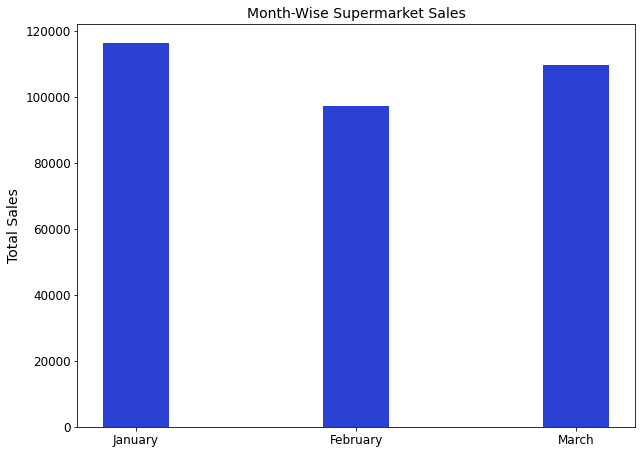

In [60]:
sales = df.groupby('Month').sum()

fig, ax = plt.subplots()
months = ['January', 'February', 'March']
bars = ax.bar(months, sales['Total'], width = 0.3, color = '#2940d3') # color = '#2940d3'

# bars[0].set_color('#ffc947')
# bars[1].set_color('#2940d3')
# bars[2].set_color('#ff96ad')


ax.set_title('Month-Wise Supermarket Sales', fontsize = 14)
ax.set_xticks(months)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Total Sales', fontsize = 14)

# Setting plot margins
plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1.3, 
                    top=1.5, 
                    wspace=0.9, 
                    hspace=0.9)

plt.show()

#### Result:
####From January, supermarket sales have slightly decreased.
####February receives least sales. This can be because February is the shortest month.
####Month-wise change in sales not very significant.

###1.2Month-Wise Sales of Different Branches

###A. Finding the Supermarket Braches (City-Wise)

In [61]:
supermarket_cities = [City for City, df in df.groupby('City')]
supermarket_cities

['Mandalay', 'Naypyitaw', 'Yangon']

###B. Filtering the Cities and Forming their Individual Data Frames

In [62]:
# forming mandalay dataframe
mandalay_filter = (df['City'] == 'Mandalay')
mandalay_df = df[mandalay_filter].copy() # Taking a copy of df to avoid warnings----Python shell cannot recognize wheather mandalay_df is view or copy 
mandalay_month_df = mandalay_df.groupby('Month').sum()
mandalay_month_df.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,6544.41,600,1770.2885,37176.0585,35405.77,528.571429,1770.2885,755.0
2,5919.62,624,1639.2510,34424.2710,32785.02,519.047619,1639.2510,763.9
3,6014.85,596,1647.4925,34597.3425,32949.85,533.333333,1647.4925,744.7


In [63]:
# forming napy dataframe
napy_filter = (df['City'] == 'Naypyitaw')
napy_df = df[napy_filter].copy()
napy_month_df = napy_df.groupby('Month').sum()
napy_month_df.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,6859.95,680,1925.4610,40434.6810,38509.22,580.952381,1925.4610,872.9
2,5808.97,537,1568.3325,32934.9825,31366.65,476.190476,1568.3325,720.0
3,5898.84,614,1771.3830,37199.0430,35427.66,504.761905,1771.3830,727.0


In [64]:
# forming yan dataframe
yan_filter = (df['City'] == 'Yangon')
yan_df = df[yan_filter].copy()
yan_month_df = yan_df.groupby('Month').sum()
yan_month_df.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Month,,,,,,,,
1,6349.53,685,1841.9585,38681.1285,36839.17,566.666667,1841.9585,842.3
2,5430.93,493,1421.9105,29860.1205,28438.21,447.619048,1421.9105,658.7
3,6845.03,681,1793.2915,37659.1215,35865.83,604.761905,1793.2915,888.2


###C. Plotting Sales for Different Branches

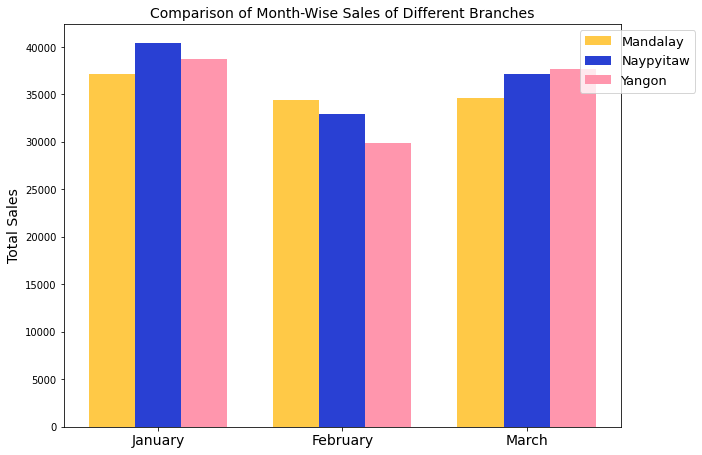

In [65]:
# Forming bar plot
x = np.arange(3)
month =  ['January', 'February', 'March']
plt.bar(x-0.25, mandalay_month_df['Total'], width = 0.25, color = '#ffc947')
plt.bar(x, napy_month_df['Total'], width = 0.25, color = '#2940d3')
plt.bar(x+0.25, yan_month_df['Total'], width = 0.25, color = '#ff96ad')

# Setting labels, title and legend
plt.xticks(x, month, size = 14)
plt.title('Comparison of Month-Wise Sales of Different Branches', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(["Mandalay", "Naypyitaw", "Yangon"], loc='upper right', bbox_to_anchor=(1.145,1), fontsize=13)  # Naypyitaw', 'Yangon

# Setting plot margins
plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1.3, 
                    top=1.5, 
                    wspace=0.9, 
                    hspace=0.9)

plt.show()


##### Result:
Sales of the branches is similar.
From January, the sales have slightly decreased for each branch.
Mandalay has most consistent sales.

#Question #2: How is the overall performance of different branches?

# Result:
The sales of different products are similar.
Profit is approximately proportional to the price.
Profit earned from fashion accessories and food and beverages is significantly larger.

###A. Obtaining Total Sales & Total Profit of Different Branches

In [66]:
mandalay_sales = mandalay_df["Total"].sum()
mandalay_profit = mandalay_df['gross income'].sum()

napy_sales = napy_df["Total"].sum()
napy_profit = napy_df['gross income'].sum()

yan_sales = yan_df["Total"].sum()
yan_profit = yan_df['gross income'].sum()

city_sales = [mandalay_sales, napy_sales, yan_sales]
city_profit = [mandalay_profit, napy_profit, yan_profit]
city_names = ["Mandalay", "Naypyitaw", "Yangon"]
print(city_sales)
print(city_profit)

[106197.67199999999, 110568.7065, 106200.3705]
[5057.032, 5265.1765, 5057.1605]


###B. Obtaining Number of Members for each Supermarket Branch

In [67]:
mandalay_filter = (mandalay_df['Customer type'] == 'Member')
mandalay_member_df = mandalay_df[mandalay_filter].copy()
mandalay_members = len(mandalay_member_df['Customer type'])

napy_filter = (napy_df['Customer type'] == 'Member')
napy_member_df = napy_df[napy_filter].copy()
napy_members = len(napy_member_df['Customer type'])

yan_filter = (yan_df['Customer type'] == 'Member')
yan_member_df = yan_df[yan_filter].copy()
yan_members = len(yan_member_df['Customer type'])

city_members = [mandalay_members, napy_members, yan_members]
city_members

[165, 169, 167]

###C. Plotting the Performance Metrics for all Supermarket Branches

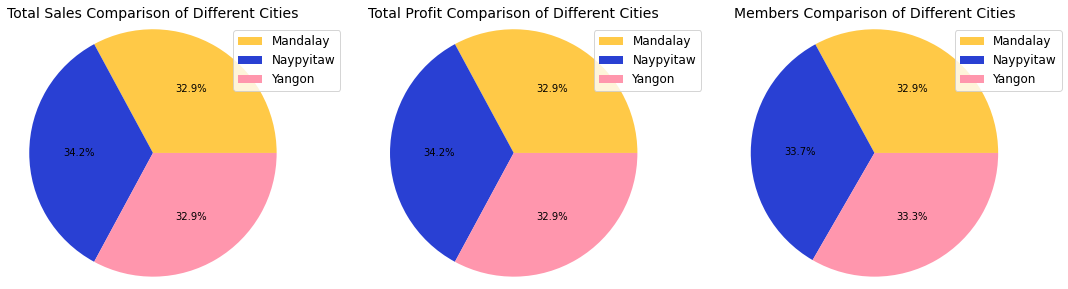

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(17, 17))
axs[0].pie(city_sales, colors = ['#ffc947', '#2940d3', '#ff96ad'], radius=1.2, autopct = "%0.1f%%")
axs[0].set_title('Total Sales Comparison of Different Cities', fontsize=14)
axs[0].legend(city_names, loc = 'upper right', bbox_to_anchor=(1.25,1), fontsize=12)
axs[0].set_aspect('equal')

axs[1].pie(city_profit, colors = ['#ffc947', '#2940d3', '#ff96ad'], radius=1.2, autopct = "%0.1f%%")
axs[1].set_title('Total Profit Comparison of Different Cities', fontsize=14)
axs[1].legend(city_names, loc = 'upper right', bbox_to_anchor=(1.25,1), fontsize=12)
axs[1].set_aspect('equal')

axs[2].pie(city_members, colors = ['#ffc947', '#2940d3', '#ff96ad'], radius=1.2, autopct = "%0.1f%%")
axs[2].set_title('Members Comparison of Different Cities', fontsize=14)
axs[2].legend(city_names, loc = 'upper right', bbox_to_anchor=(1.25,1), fontsize=12)
axs[2].set_aspect('equal')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Result:
Sales and profit of Napyitaw is slightly larger.
All the branches have almost same members.

#Question #3: What were the most sold items? What is the most profitable product line?

###A. Grouping Dataframe According to the Product Line

In [69]:
# Grouping dataframe 
sales = df.groupby('Product line').sum()
sales['Unit price'] = sales['Unit price']/sales['Quantity']

# Correcting corresponding columns 
sales['gross margin percentage'] = sales['gross margin percentage']/sales['Quantity'] 
sales['Rating'] = (sales['Rating'])*(len(sales['Rating'])/len(df['Rating'])) 
sales.head(10)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Product line,,,,,,,,,
Electronic accessories,9.375664,971,2587.5015,54337.5315,51750.03,0.833701,2587.5015,7.0632,348
Fashion accessories,11.278659,902,2585.9950,54305.8950,51719.90,0.939711,2585.9950,7.5072,346
Food and beverages,10.236912,952,2673.5640,56144.8440,53471.28,0.870348,2673.5640,7.4262,348
Health and beauty,9.763326,854,2342.5590,49193.7390,46851.18,0.847552,2342.5590,6.3870,312
Home and lifestyle,9.715379,911,2564.8530,53861.9130,51297.06,0.836339,2564.8530,6.5640,324
Sports and travel,10.283565,920,2624.8965,55122.8265,52497.93,0.859213,2624.8965,6.8886,315


###B. Plotting the Sales of Different Product Lines and Representing Corresponding Prices and Profits

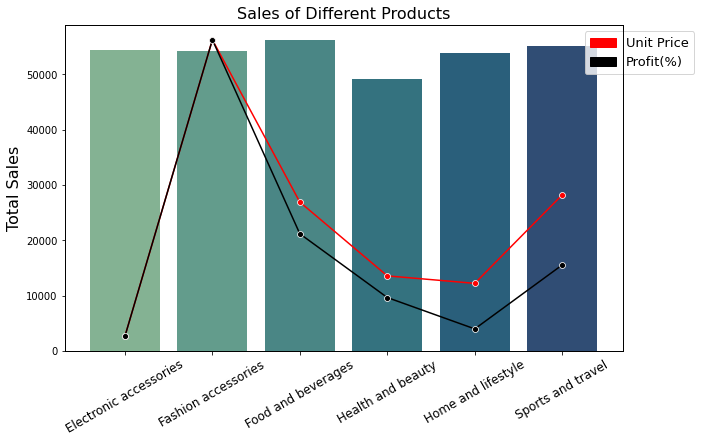

In [70]:
# Declaring figure parameters
products =  [Product for Product, df in df.groupby('Product line')]
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Bar Chart
ax1 = sns.barplot(x=products, y=sales['Total'], data = sales, palette='crest')
ax1.set_title('Sales of Different Products', fontsize = 16)
ax1.set_ylabel('Total Sales', fontsize=16)
ax1.tick_params(axis='x', rotation = 30)
ax1.set_xticklabels(products, fontsize=12)
ax1.tick_params(axis='y')


# Plotting Line Charts
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = products, y= sales['Unit price'], data=sales, color = 'r' ,lw=1.5, marker='o')  # '#ffc947', '#2940d3'
ax2.set(ylabel=None)
ax2.set(yticklabels=[])
# ax2.tick_params(left=False)
ax2.set_yticks([])

ax3 = ax1.twinx()
ax3 = sns.lineplot(x = products, y= sales['gross margin percentage'], data=sales, color = 'black', lw=1.5, marker='o')
ax3.set(yticklabels=[])
ax3.set(ylabel=None)
ax3.set_yticks([])

price = mpatches.Patch(color='r')
profit = mpatches.Patch(color='black')

# Defining Legend
name = ['Unit Price', 'Profit(%)']
ax1.legend(labels=name, handles=[price, profit], loc="upper right", bbox_to_anchor=(1.14, 1), fontsize=13)

plt.show()


#Question #4: How are the ratings of different product lines? Is there a relation of ratings with prices?

###A. Plotting Ratings and Corresponding Prices (A sectio pending)

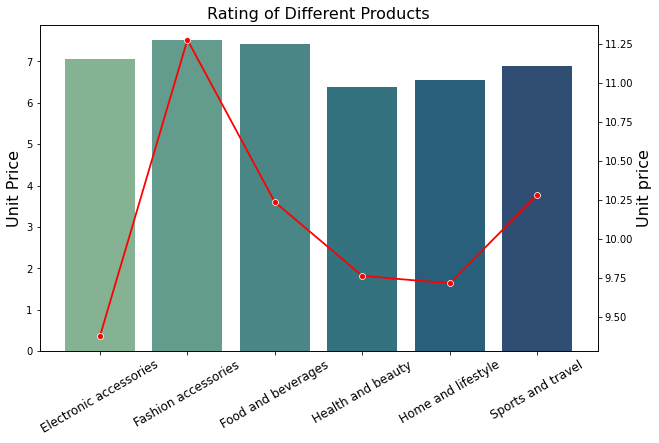

In [71]:
fig, ax1 = plt.subplots(figsize=(10, 6))




ax1 = sns.barplot(x=products, y=sales['Rating'], data = sales, palette='crest')
ax1.set_title('Rating of Different Products', fontsize = 16)
ax1.set_ylabel('Unit Price', fontsize=16)
ax1.set_xticklabels(products, fontsize=12)

ax1.tick_params(axis='x', rotation = 30)
ax1.tick_params(axis='y')

ax3 = ax1.twinx()
ax3.set_ylabel('Unit price',  fontsize = 16)
ax3 = sns.lineplot(x = products, y= 'Unit price', data=sales, color = 'r', marker='o', lw=1.8)
ax3.tick_params(axis='y')

plt.show()

# Result:
Products with smaller prices tend to get slightly lower ratings.

# Question #5: Who are the leading buyers?

###A. Obtaining Sales of Members and Non-Members

In [72]:
customer_type_df = df.groupby('Customer type').sum()
member_sales = customer_type_df.iloc[0]['Unit price']
normal_sales = customer_type_df.iloc[1]['Unit price']
member_normal_sales = [member_sales, normal_sales]
member_normal_legend = ['Member', 'Normal']
customer_type_df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Customer type,,,,,,,,,
Member,28159.70,2785,7820.164,164223.444,156403.28,2385.714286,7820.164,3477.1,996
Normal,27512.43,2725,7559.205,158743.305,151184.10,2376.190476,7559.205,3495.6,997


###B. Obtaining Sales of Males and Females

In [73]:
customer_gender_df = df.groupby('Gender').sum()
female_sales = customer_gender_df.iloc[0]['Total']
male_sales = customer_gender_df.iloc[1]['Total']
female_male_sales = [female_sales, male_sales]
female_male_legend = ['Females', 'Males']
customer_gender_df.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Gender,,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2,987
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5,1006


###C. Plotting the Sales of Respective Customer Segments

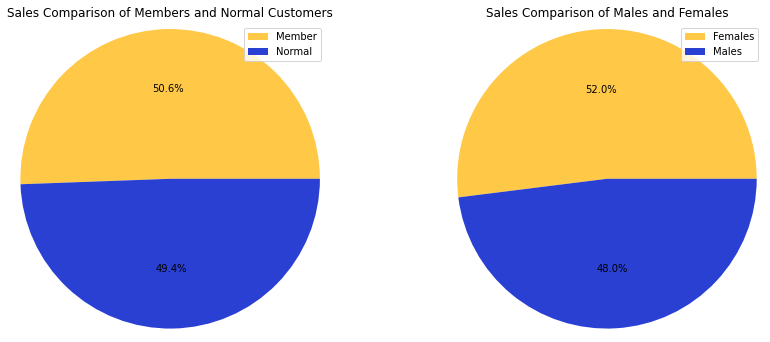

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(13, 13))
axs[0].pie(member_normal_sales, colors = ['#ffc947', '#2940d3'], radius=1.2, autopct = "%0.1f%%")
axs[0].set_title('Sales Comparison of Members and Normal Customers')
axs[0].legend(member_normal_legend, loc = 'upper right')
axs[0].set_aspect('equal')

axs[1].pie(female_male_sales, colors = ['#ffc947', '#2940d3'], radius=1.2, autopct = "%0.1f%%")
axs[1].set_title('Sales Comparison of Males and Females')
axs[1].legend(female_male_legend, loc = 'upper right')
axs[1].set_aspect('equal')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Result:
The sale from members and non-members is almost same.
The sale from female customers is slightly more than the male customers.

#Question #6: Which days of the week have most sales?

###A. Adding Day of the Week Column

In [75]:
df['Date'] =  pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name() # "day_name()" is the new command instead of "day_name"
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday


###B. Summing the Total Sales According to the Day of the Week

In [76]:
daywise_df = df.groupby('Day').sum()
daywise_df = daywise_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
daywise_df.head(10)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Day,,,,,,,,,
Monday,7216.00,638,1804.7180,37899.0780,36094.36,595.238095,1804.7180,894.2,245
Tuesday,8664.28,862,2451.5355,51482.2455,49030.71,752.380952,2451.5355,1106.5,312
Wednesday,7688.35,800,2082.4350,43731.1350,41648.70,680.952381,2082.4350,973.2,280
Thursday,7860.35,755,2159.4880,45349.2480,43189.76,657.142857,2159.4880,950.8,264
Friday,7658.52,758,2091.7305,43926.3405,41834.61,661.904762,2091.7305,983.6,289
Saturday,9333.74,919,2672.4195,56120.8095,53448.39,780.952381,2672.4195,1131.9,337
Sunday,7250.89,778,2117.0425,44457.8925,42340.85,633.333333,2117.0425,932.5,266


###C. Plotting the Sales

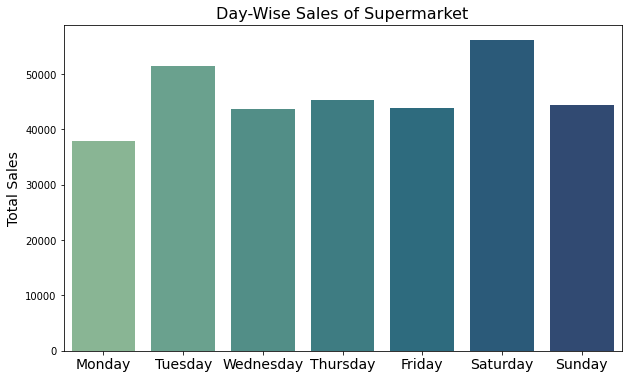

In [77]:
fig, ax1 = plt.subplots(figsize=(10, 6))

daywise_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax1 = sns.barplot(x=daywise_day, y=daywise_df['Total'], data = daywise_df, palette='crest')
ax1.set_title('Day-Wise Sales of Supermarket', size=16)

ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_ylabel('Total Sales', fontsize=14)
ax1.set_xticklabels(daywise_day, fontsize=14)
plt.show()

# Result:
Tuesday and saturday have larger sale in the week.
Monday has the least sale in the week.

#Question #7: How different customers prefer visiting the supermarket?

###1.1. Sales Analysis Based on Membership

###A. Filtering and Forming the Data Frame for Members¶

In [78]:
member_filter = (df['Customer type'] == 'Member')
member_df = df[member_filter]
member_daywise_df = member_df.groupby('Day').sum()
member_daywise_df = member_daywise_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
member_daywise_df.head(7)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Day,,,,,,,,,
Monday,3356.34,323,874.0510,18355.0710,17481.02,280.952381,874.0510,445.3,110
Tuesday,4822.42,491,1366.1650,28689.4650,27323.30,428.571429,1366.1650,616.6,181
Wednesday,3927.67,436,1092.6150,22944.9150,21852.30,361.904762,1092.6150,506.1,155
Thursday,3635.17,308,875.8875,18393.6375,17517.75,304.761905,875.8875,431.9,118
Friday,3722.46,352,1056.3735,22183.8435,21127.47,304.761905,1056.3735,453.4,124
Saturday,4766.47,464,1339.1885,28122.9585,26783.77,390.476190,1339.1885,558.9,174
Sunday,3929.17,411,1215.8835,25533.5535,24317.67,314.285714,1215.8835,464.9,134


###B. Filtering and forming the dataframe for Non-Members (Normal Customers)

In [79]:
nonmember_filter = (df['Customer type'] ==  'Normal')
nonmember_df = df[nonmember_filter]
nonmember_daywise_df = nonmember_df.groupby('Day').sum()
nonmember_daywise_df = nonmember_daywise_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
nonmember_daywise_df.head(7)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Day,,,,,,,,,
Monday,3859.66,315,930.6670,19544.0070,18613.34,314.285714,930.6670,448.9,135
Tuesday,3841.86,371,1085.3705,22792.7805,21707.41,323.809524,1085.3705,489.9,131
Wednesday,3760.68,364,989.8200,20786.2200,19796.40,319.047619,989.8200,467.1,125
Thursday,4225.18,447,1283.6005,26955.6105,25672.01,352.380952,1283.6005,518.9,146
Friday,3936.06,406,1035.3570,21742.4970,20707.14,357.142857,1035.3570,530.2,165
Saturday,4567.27,455,1333.2310,27997.8510,26664.62,390.476190,1333.2310,573.0,163
Sunday,3321.72,367,901.1590,18924.3390,18023.18,319.047619,901.1590,467.6,132


###C. Plotting Day-Wise Sales Comparison of Members and Non-Members

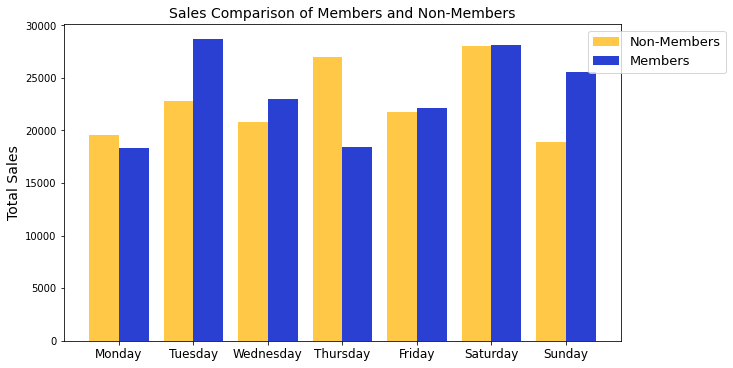

In [80]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = np.arange(7)
plt.bar(x-0.2, nonmember_daywise_df['Total'], width = 0.4, color = '#ffc947')
plt.bar(x+0.2, member_daywise_df['Total'], width = 0.4, color = '#2940d3')
plt.xticks(x, day, fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Sales Comparison of Members and Non-Members', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.legend(["Non-Members", "Members"], loc = 'upper right', bbox_to_anchor=(1.2,1), fontsize=13)

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1.3, 
                    top=1.2, 
                    wspace=0.9, 
                    hspace=0.9)

plt.show()

# Result:
On tuesday and sunday, member purchases is larger. On these days, supermarket should focus on member's segment.
On thursday, non-member purchases is larger. On this day, supermarket has a better chance to increase memberships.

###1.2 Sales Analysis Based on Gender

###A. Filtering Female Customers and Forming their Dataframe

In [81]:
female_filter = (df['Gender'] == 'Female')
female_df = df[female_filter]
female_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,Friday
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,2022-07-17 14:36:00,Ewallet,413.04,4.761905,20.6520,5.8,2,Monday
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,2022-07-17 11:38:00,Ewallet,735.60,4.761905,36.7800,8.0,2,Sunday
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,2022-07-17 17:15:00,Credit card,72.52,4.761905,3.6260,7.2,1,Thursday


###B. Filtering Male Customers and Forming their Dataframe

In [82]:
male_filter = (df['Gender'] == 'Male')
male_df = df[male_filter]
male_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,2022-07-17 18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,3,Monday
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,2019-03-09,2022-07-17 17:03:00,Cash,102.04,4.761905,5.1020,6.8,3,Saturday


###C. Representing Female Dataframe on Weekday Basis (Day-Wise)

In [83]:
female_daywise_df = female_df.groupby('Day').sum()
female_daywise_df = female_daywise_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
female_daywise_df.head(10)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Day,,,,,,,,,
Monday,3863.12,349,972.0005,20412.0105,19440.01,323.809524,972.0005,500.5,139
Tuesday,4889.61,499,1449.1415,30431.9715,28982.83,414.285714,1449.1415,615.0,167
Wednesday,3429.36,362,949.3635,19936.6335,18987.27,304.761905,949.3635,433.1,115
Thursday,3352.16,349,977.3100,20523.5100,19546.20,300.000000,977.3100,426.5,126
Friday,3688.94,400,1149.8955,24147.8055,22997.91,309.523810,1149.8955,461.2,130
Saturday,4928.84,493,1396.6775,29330.2275,27933.55,414.285714,1396.6775,602.8,178
Sunday,3535.21,417,1100.0365,23100.7665,22000.73,319.047619,1100.0365,450.1,132


###D. Representing Male Dataframe on Weekday Basis (Day-Wise)

In [84]:
male_daywise_df = male_df.groupby('Day').sum()
male_daywise_df = male_daywise_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
male_daywise_df.head(10)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Day,,,,,,,,,
Monday,3352.88,289,832.7175,17487.0675,16654.35,271.428571,832.7175,393.7,106
Tuesday,3774.67,363,1002.3940,21050.2740,20047.88,338.095238,1002.3940,491.5,145
Wednesday,4258.99,438,1133.0715,23794.5015,22661.43,376.190476,1133.0715,540.1,165
Thursday,4508.19,406,1182.1780,24825.7380,23643.56,357.142857,1182.1780,524.3,138
Friday,3969.58,358,941.8350,19778.5350,18836.70,352.380952,941.8350,522.4,159
Saturday,4404.90,426,1275.7420,26790.5820,25514.84,366.666667,1275.7420,529.1,159
Sunday,3715.68,361,1017.0060,21357.1260,20340.12,314.285714,1017.0060,482.4,134


###E. Plotting Male and Female Sales (Day-Wise)

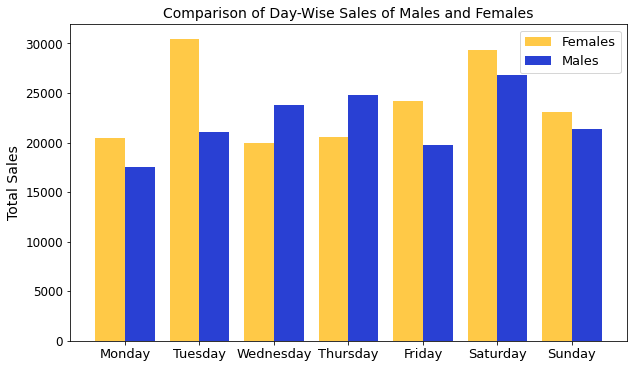

In [85]:
x = np.arange(7)
plt.bar(x-0.2, female_daywise_df['Total'], width = 0.4, color = '#ffc947')
plt.bar(x+0.2, male_daywise_df['Total'], width = 0.4, color = '#2940d3')
plt.xticks(x, day, size = 10, fontsize=13)
plt.yticks(size = 10, fontsize=12)
plt.title('Comparison of Day-Wise Sales of Males and Females', fontsize = 14)
plt.ylabel('Total Sales', fontsize =14)
plt.legend(["Females", "Males"], fontsize = 13)
plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1.3, 
                    top=1.2, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

# Result:
Sales from males and females is similar. Families seem to do most of the purchases.
Exceptionally, on tuesday number of female customers is significantly larger. Therefore; on tuesday, supermarket should focus more on ladies segment.
Wednesday and thursday have more male customers. Therefore; on these days, supermarket should focus on men segment.

#Question #8: Which customer segment prefer membership?

###1.1 Analysing Memberships Among Customer Genders

###A. Forming Member and Non-Member Dataframes for Female Customers

In [86]:
female_member_filter = (female_df['Customer type'] == 'Member')
female_member_df = female_df[female_member_filter]
total_female_members = len(female_member_df)

female_nonmember_filter = (female_df['Customer type'] == 'Normal')
female_nonmember_df = female_df[female_nonmember_filter]
total_female_nonmembers = len(female_nonmember_df)

###B. Forming Member and Non-Member Dataframes for Male Customers

In [87]:
male_member_filter = (male_df['Customer type'] == 'Member')
male_member_df = male_df[male_member_filter]
total_male_members = len(male_member_df)

male_nonmember_filter = (male_df['Customer type'] == 'Normal')
male_nonmember_df = male_df[male_nonmember_filter]
total_male_nonmembers = len(male_nonmember_df)

###C. Plotting Membership and Non-Membership Count for Males and Females

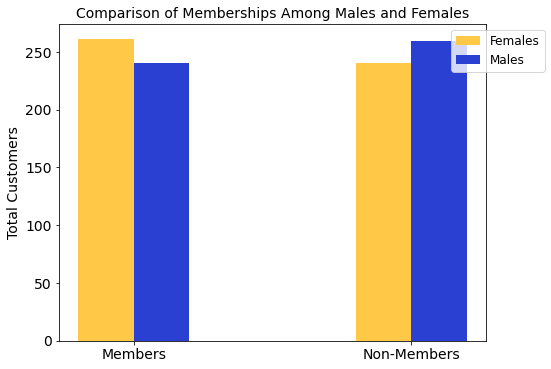

In [88]:
x = np.arange(2)
categories = ['Members', 'Non-Members']
female_count = [total_female_members, total_female_nonmembers]
male_count = [total_male_members, total_male_nonmembers]

plt.bar(x-0.1, female_count, width = 0.2, color = '#ffc947')
plt.bar(x+0.1, male_count, width = 0.2, color = '#2940d3')

plt.xticks(x, categories, size = 10, fontsize=14)
plt.yticks(size = 10, fontsize=14)
plt.title('Comparison of Memberships Among Males and Females', fontsize = 14)
plt.ylabel('Total Customers', fontsize =14)
plt.legend(["Females", "Males"], fontsize = 12, loc="upper right", bbox_to_anchor=(1.15,1))
plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1, 
                    top=1.2, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

# Result:
There is a slight difference between female and male memberships.
The difference between male and female non-members is also small.
Overall, female customers prefer memberships slightly more.

#Question #9: Which products are more purchased by different customer segments?

In [89]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday


###A. Forming Product Wise Dataframes

In [90]:
# 1. Electronics Accessories
electronic_filter = (df['Product line'] == 'Electronic accessories')
product_electronic_df = df[electronic_filter]

female_filter = (product_electronic_df['Gender'] == 'Female')
product_electronic_female_df = product_electronic_df[female_filter]
total_female_electronic_sales = product_electronic_female_df['Total'].sum()
print('total_female_electronic_sales: {}'.format(total_female_electronic_sales))

male_filter = (product_electronic_df['Gender'] == 'Male')
product_electronic_male_df = product_electronic_df[male_filter]
total_male_electronic_sales = product_electronic_male_df['Total'].sum()
print('total_male_electronic_sales: {}'.format(total_male_electronic_sales))


member_filter = (product_electronic_df['Customer type'] == 'Member')
product_electronic_member_df = product_electronic_df[member_filter]
total_member_electronic_sales = product_electronic_member_df['Total'].sum()
print('total_member_electronic_sales: {}'.format(total_member_electronic_sales))

nonmember_filter = (product_electronic_df['Customer type'] == 'Normal')
product_electronic_nonmember_df = product_electronic_df[nonmember_filter]
total_nonmember_electronic_sales = product_electronic_nonmember_df['Total'].sum()
print('total_nonmember_electronic_sales: {}'.format(total_nonmember_electronic_sales))

# 2. Fashion Accessories
fashion_filter = (df['Product line'] == 'Fashion accessories')
product_fashion_df = df[fashion_filter]

female_filter = (product_fashion_df['Gender'] == 'Female')
product_fashion_female_df = product_fashion_df[female_filter]
total_female_fashion_sales = product_fashion_female_df['Total'].sum()
print('\ntotal_female_fashion_sales: {}'.format(total_female_fashion_sales))

male_filter = (product_fashion_df['Gender'] == 'Male')
product_fashion_male_df = product_fashion_df[male_filter]
total_male_fashion_sales = product_fashion_male_df['Total'].sum()
print('total_male_fashion_sales: {}'.format(total_male_fashion_sales))

member_filter = (product_fashion_df['Customer type'] == 'Member')
product_fashion_member_df = product_fashion_df[member_filter]
total_member_fashion_sales = product_fashion_member_df['Total'].sum()
print('total_member_fashion_sales: {}'.format(total_member_fashion_sales))

nonmember_filter = (product_fashion_df['Customer type'] == 'Normal')
product_fashion_nonmember_df = product_fashion_df[nonmember_filter]
total_nonmember_fashion_sales = product_fashion_nonmember_df['Total'].sum()
print('total_nonmember_fashion_sales: {}'.format(total_nonmember_fashion_sales))

# 3. Food and beverages
food_filter = (df['Product line'] == 'Food and beverages')
product_food_df = df[food_filter]

female_filter = (product_food_df['Gender'] == 'Female')
product_food_female_df = product_food_df[female_filter]
total_female_food_sales = product_food_female_df['Total'].sum()
print('\ntotal_female_food_sales: {}'.format(total_female_food_sales))

male_filter = (product_food_df['Gender'] == 'Male')
product_food_male_df = product_food_df[male_filter]
total_male_food_sales = product_food_male_df['Total'].sum()
print('total_male_food_sales: {}'.format(total_male_food_sales))

member_filter = (product_food_df['Customer type'] == 'Member')
product_food_member_df = product_food_df[member_filter]
total_member_food_sales = product_food_member_df['Total'].sum()
print('total_member_food_sales: {}'.format(total_member_food_sales))

nonmember_filter = (product_food_df['Customer type'] == 'Normal')
product_food_nonmember_df = product_food_df[nonmember_filter]
total_nonmember_food_sales = product_food_nonmember_df['Total'].sum()
print('total_nonmember_food_sales: {}'.format(total_nonmember_food_sales))

# 4. Health and beauty
health_filter = (df['Product line'] == 'Health and beauty')
product_health_df = df[health_filter]

female_filter = (product_health_df['Gender'] == 'Female')
product_health_female_df = product_health_df[female_filter]
total_female_health_sales = product_health_female_df['Total'].sum()
print('\ntotal_female_health_sales: {}'.format(total_female_health_sales))

male_filter = (product_health_df['Gender'] == 'Male')
product_health_male_df = product_health_df[male_filter]
total_male_health_sales = product_health_male_df['Total'].sum()
print('total_male_health_sales: {}'.format(total_male_health_sales))

member_filter = (product_health_df['Customer type'] == 'Member')
product_health_member_df = product_health_df[member_filter]
total_member_health_sales = product_health_member_df['Total'].sum()
print('total_member_health_sales: {}'.format(total_member_health_sales))

nonmember_filter = (product_health_df['Customer type'] == 'Normal')
product_health_nonmember_df = product_health_df[nonmember_filter]
total_nonmember_health_sales = product_health_nonmember_df['Total'].sum()
print('total_nonmember_health_sales: {}'.format(total_nonmember_health_sales))

# 5. Home and lifestyle
home_filter = (df['Product line'] == 'Home and lifestyle')
product_home_df = df[home_filter]

female_filter = (product_home_df['Gender'] == 'Female')
product_home_female_df = product_home_df[female_filter]
total_female_home_sales = product_home_female_df['Total'].sum()
print('\ntotal_female_home_sales: {}'.format(total_female_home_sales))

male_filter = (product_home_df['Gender'] == 'Male')
product_home_male_df = product_home_df[male_filter]
total_male_home_sales = product_home_male_df['Total'].sum()
print('total_male_home_sales: {}'.format(total_male_home_sales))

member_filter = (product_home_df['Customer type'] == 'Member')
product_home_member_df = product_home_df[member_filter]
total_member_home_sales = product_home_member_df['Total'].sum()
print('total_member_home_sales: {}'.format(total_member_home_sales))

nonmember_filter = (product_home_df['Customer type'] == 'Normal')
product_home_nonmember_df = product_home_df[nonmember_filter]
total_nonmember_home_sales = product_home_nonmember_df['Total'].sum()
print('total_nonmember_home_sales: {}'.format(total_nonmember_home_sales))

# 6. Sports and travel
sports_filter = (df['Product line'] == 'Sports and travel')
product_sports_df = df[sports_filter]

female_filter = (product_sports_df['Gender'] == 'Female')
product_sports_female_df = product_sports_df[female_filter]
total_female_sports_sales = product_sports_female_df['Total'].sum()
print('\ntotal_female_sports_sales: {}'.format(total_female_sports_sales))

male_filter = (product_sports_df['Gender'] == 'Male')
product_sports_male_df = product_sports_df[male_filter]
total_male_sports_sales = product_sports_male_df['Total'].sum()
print('total_male_sports_sales: {}'.format(total_male_sports_sales))

member_filter = (product_sports_df['Customer type'] == 'Member')
product_sports_member_df = product_sports_df[member_filter]
total_member_sports_sales = product_sports_member_df['Total'].sum()
print('total_member_sports_sales: {}'.format(total_member_sports_sales))

nonmember_filter = (product_sports_df['Customer type'] == 'Normal')
product_sports_nonmember_df = product_sports_df[nonmember_filter]
total_nonmember_sports_sales = product_sports_nonmember_df['Total'].sum()
print('total_nonmember_sports_sales: {}'.format(total_nonmember_sports_sales))

total_female_electronic_sales: 27102.022499999995
total_male_electronic_sales: 27235.509000000005
total_member_electronic_sales: 24498.494999999995
total_nonmember_electronic_sales: 29839.0365

total_female_fashion_sales: 30437.399999999998
total_male_fashion_sales: 23868.494999999995
total_member_fashion_sales: 26323.962
total_nonmember_fashion_sales: 27981.933

total_female_food_sales: 33170.9175
total_male_food_sales: 22973.9265
total_member_food_sales: 31357.620000000003
total_nonmember_food_sales: 24787.224000000002

total_female_health_sales: 18560.986500000003
total_male_health_sales: 30632.7525
total_member_health_sales: 25831.0395
total_nonmember_health_sales: 23362.6995

total_female_home_sales: 30036.877500000006
total_male_home_sales: 23825.0355
total_member_home_sales: 27978.027
total_nonmember_home_sales: 25883.886000000006

total_female_sports_sales: 28574.720999999998
total_male_sports_sales: 26548.1055
total_member_sports_sales: 28234.3005
total_nonmember_sports_sales:

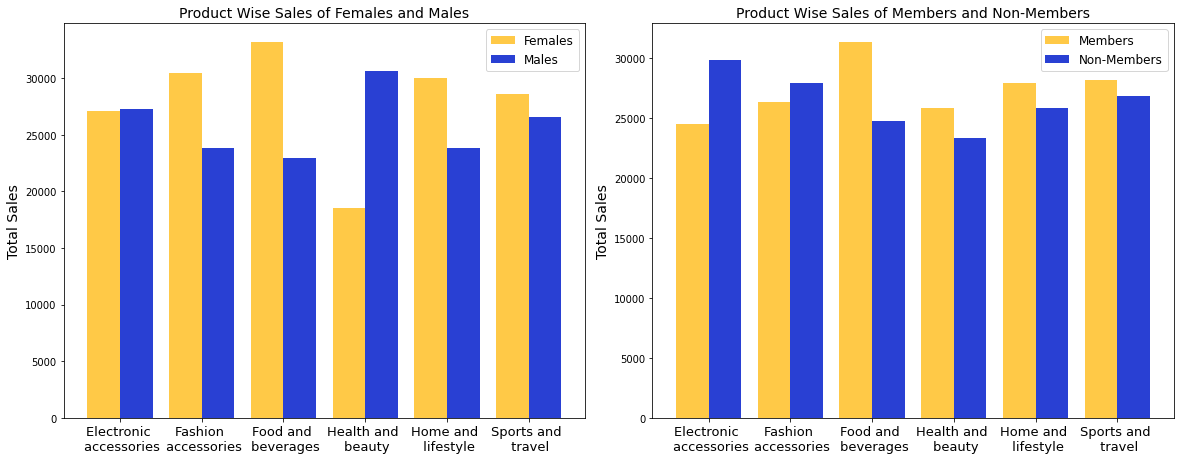

In [91]:
# Declaring plotting variables 
x = np.arange(6)
female_product_sales = [total_female_electronic_sales, total_female_fashion_sales, total_female_food_sales, total_female_health_sales, total_female_home_sales, total_female_sports_sales]
male_product_sales = [total_male_electronic_sales, total_male_fashion_sales, total_male_food_sales, total_male_health_sales, total_male_home_sales, total_male_sports_sales]

member_product_sales = [total_member_electronic_sales, total_member_fashion_sales, total_member_food_sales, total_member_health_sales, total_member_home_sales, total_member_sports_sales]
nonmember_product_sales = [total_nonmember_electronic_sales, total_nonmember_fashion_sales, total_nonmember_food_sales, total_nonmember_health_sales, total_nonmember_home_sales, total_nonmember_sports_sales]

products = ['Electronic \n accessories', 'Fashion \n accessories', 'Food and \n beverages', 'Health and \n beauty', 'Home and \n lifestyle', 'Sports and \n travel']

fig, ax = plt.subplots(1, 2, figsize=(16.5, 6.5))

# Subplotting (1,1)
ax[0].bar(x-0.2, female_product_sales, width = 0.4, color = '#ffc947')
ax[0].bar(x+0.2, male_product_sales, width = 0.4, color = '#2940d3')

ax[0].set_xticks(x)
ax[0].set_xticklabels(products, fontsize=13, rotation = '0')
ax[0].set_title('Product Wise Sales of Females and Males', fontsize = 14)
ax[0].set_ylabel('Total Sales', fontsize =14)
ax[0].legend(["Females", "Males"], fontsize = 12)


# Subplotting (1,2)
ax[1].bar(x-0.2, member_product_sales, width = 0.4, color = '#ffc947')
ax[1].bar(x+0.2, nonmember_product_sales, width = 0.4, color = '#2940d3')

ax[1].set_xticks(x)
ax[1].set_xticklabels(products, fontsize=13, rotation = '0')
ax[1].set_title('Product Wise Sales of Members and Non-Members', fontsize = 14)
ax[1].set_ylabel('Total Sales', fontsize =14)
ax[1].legend(["Members", "Non-Members"], fontsize = 12)

fig.tight_layout()
plt.show()

# Result (Based on Gender):
"Electronic Accessories" and "Sports and Travel" items are almost equally purchased by males and females.
Female customers contribute larger amount of sales from "Fashion Accessories", "Food and Beverages" and "Home and Lifestyle".
Male customers contribute larger amount of sales from "Health adn Beauty".

# Result (Based on Membership):
"Fashion Accessories" "Health and Beauty", "Home and Lifestyle" and "Sports and Travel" items are almost equally purchased by Members and Non-Members.
Non-Members contribute larger amount of sales from "Electronic Accessories".
Members contribute larger amount of sales from "Food and Beverages".

#Question #10: What is the preferred payment for different customers?

###A. Finding Different Types of Payments (Not Given in the Dataset)

In [92]:
supermarket_payment = [Payment for Payment, df in df.groupby('Payment')]
supermarket_payment

['Cash', 'Credit card', 'Ewallet']

###B. Forming Dataset for Members and Non-Members

In [93]:
member_payment_df = member_df.groupby('Payment').sum()
member_payment = member_payment_df['Total']

nonmember_payment_df = nonmember_df.groupby('Payment').sum()
nonmember_payment = nonmember_payment_df['Total']

payment_legends = ['Cash', 'Credit card', 'Ewallet']

###C. Forming Dataset for Females and Males

In [94]:
female_payment_df = female_df.groupby('Payment').sum()
female_payment = female_payment_df['Total']

male_payment_df = male_df.groupby('Payment').sum()
male_payment = male_payment_df['Total']

female_payment_df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Payment,,,,,,,,,
Cash,10123.74,1004,2834.010,59514.210,56680.2,847.619048,2834.010,1278.2,334
Credit card,8552.67,928,2547.545,53498.445,50950.9,776.190476,2547.545,1123.1,325
Ewallet,9010.83,937,2612.870,54870.270,52257.4,761.904762,2612.870,1087.9,328


###D. Plotting Payment Preferences for Different Customer Segments

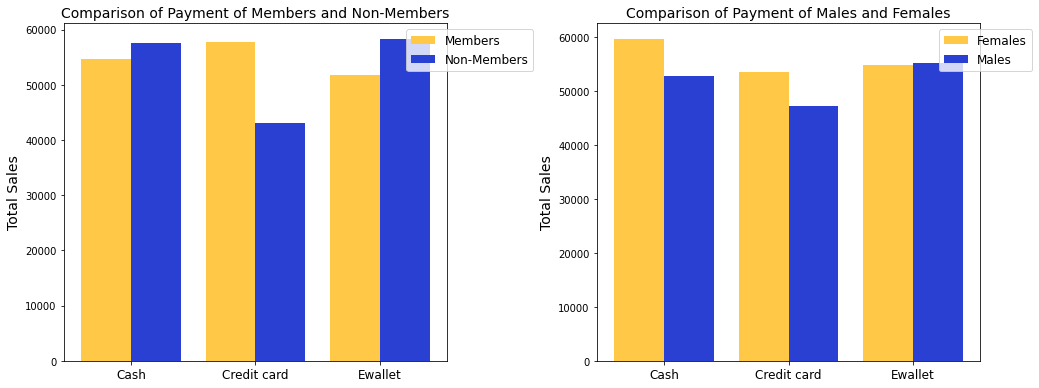

In [95]:
x = np.arange(3)
fig, ax = plt.subplots(1, 2, figsize=(14.5, 5.5))
ax[0].bar(x-0.2, member_payment, width = 0.4, color = '#ffc947')
ax[0].bar(x+0.2, nonmember_payment, width = 0.4, color = '#2940d3')
ax[0].set_xticks(x)
ax[0].set_xticklabels(supermarket_payment, fontsize=12)
ax[0].set_title('Comparison of Payment of Members and Non-Members', fontsize = 14)
ax[0].set_ylabel('Total Sales', fontsize =14)
ax[0].legend(["Members", 'Non-Members'], fontsize = 12, loc = "upper right", bbox_to_anchor=(1.24,1))

ax[1].bar(x-0.2, female_payment, width = 0.4, color = '#ffc947')
ax[1].bar(x+0.2, male_payment, width = 0.4, color = '#2940d3')
ax[1].set_xticks(x)
ax[1].set_xticklabels(supermarket_payment, fontsize=12)
ax[1].set_title('Comparison of Payment of Males and Females', fontsize = 14)
ax[1].set_ylabel('Total Sales', fontsize =14)
ax[1].legend(["Females", 'Males'], fontsize = 12, loc="upper right",bbox_to_anchor=(1.15,1))
fig.tight_layout()

plt.show()

# Result (Based on Memberships):
All payment methods are significantly used.
Cash payments methods are almost equally used among members and non-members.
Members use more credit card payments.
Non-members use slightly larger e-wallet payments.

# Result (Based on Gender):
All payment methods are significantly used.
Cash and credit card payments methods are more used by females.
Ewallet payment is almost equally used by both the genders

In [96]:
from google.colab import files

df.to_csv('supermarket sales.csv')
files.download('supermarket sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>